#### macrodata.csv 파일을 이용하여:
1. 년도별 분기로 datetimeIndex를 생성하고
    - index = pd.DatetimeIndex(['1Q1959', '2Q1959'])  

2. realgdp, realcons, realdpi 변수에 대해  
    - rolling을 통해 년도별 평균에 대한 그래프를 그려라.
    - ewm을 통해 span = 6, window 객체를 생성하고 년도별 평균에 대한 그래프를 그려라.

3. rolling을 통해 년도별 Window 객체를 생성하고,
    - 년도별 최대값과 최소값의 차이를 생성하는 함수를 작성하라.
    - 이 함수를 apply 메소드를 적용하여 
    - minmax 데이터프레임을 만들고 그려라.

In [1]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 8))

In [80]:
path = 'C:/Users/tmznq/workspace/ml_scratch/seoul_coding_academy/pydata-book-1st-edition/ch08/macrodata.csv'

data = pd.read_csv(path)
data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [81]:
data.quarter

0      1.0
1      2.0
2      3.0
3      4.0
4      1.0
5      2.0
      ... 
197    2.0
198    3.0
199    4.0
200    1.0
201    2.0
202    3.0
Name: quarter, Length: 203, dtype: float64

In [101]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [113]:
data.index = index

In [111]:
data.index = data.index.astype('datetime64[ns]')

In [114]:
real = data[['realgdp', 'realcons', 'realdpi']]
real.head()

,realgdp,realcons,realdpi
1959Q1,2710.349,1707.4,1886.9
1959Q2,2778.801,1733.7,1919.7
1959Q3,2775.488,1751.8,1916.4
1959Q4,2785.204,1753.7,1931.3
1960Q1,2847.699,1770.5,1955.5


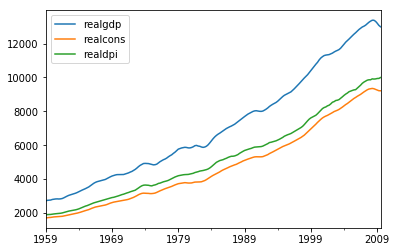

In [99]:
real.rolling(window=4, min_periods=0).mean().plot()

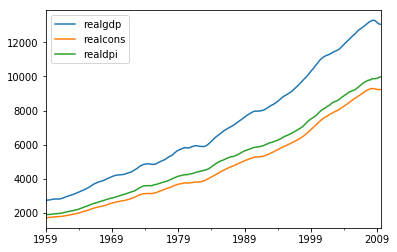

In [98]:
real.ewm(span=6).mean().plot()

C:\Users\tmznq\Anaconda3\envs\ml_scratch\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


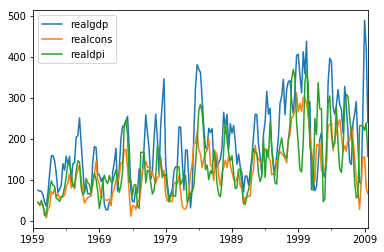

In [96]:
real.rolling(window=4).apply(lambda x: x.max() - x.min()).plot()

In [ ]:
### 참고

In [66]:
dq, dy = data.quarter.tolist(), data

In [67]:
def drange(x):
    return x.max() - x.min()

In [ ]:
Datetiemindex, PeriodIndex간의 전환

In [ ]:
idx = period
idx.astype('datetiem64[ns]') 

In [ ]:
dt_idx.to_period('Q-DEC')